In this notebook we look at Jack's data.

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy, pandas

/home/alger/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [25]:
from RMtools.RMutils.util_RM import do_rmsynth, do_rmclean

In [4]:
jack_path = Path(
    '/home/alger/possum/livingston/stokes_data_collection/'
    'galactic_centre/')

In [16]:
test_path = sorted(jack_path.iterdir())[6]

colnames = ['freq', 'I', 'Q', 'U', 'I_RMS', 'Q_RMS', 'U_RMS']
data = pandas.read_table(test_path, sep=' ', names=colnames)
data['lsq'] = (3e8 / data.freq) ** 2

## Basic plots

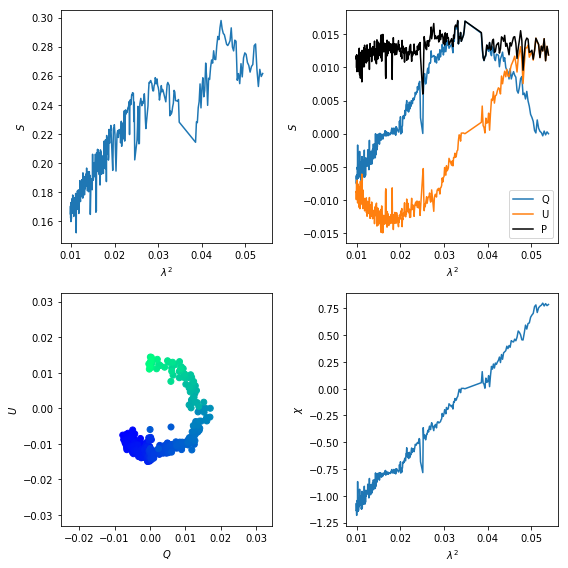

In [21]:
fig, ((a, b), (c, d)) = plt.subplots(2, 2, figsize=(8, 8))
a.plot(data.lsq, data.I)
a.set_xlabel('$\\lambda^2$')
a.set_ylabel('$S$')
b.plot(data.lsq, data.Q, label='Q')
b.plot(data.lsq, data.U, label='U')
b.plot(data.lsq, numpy.sqrt(data.Q ** 2 + data.U ** 2), label='P',
       c='k')
b.set_xlabel('$\\lambda^2$')
b.set_ylabel('$S$')
b.legend()
c.scatter(data.Q, data.U, c=data.lsq, cmap='winter')
c.set_xlabel('$Q$')
c.set_ylabel('$U$')
# c.set_xlim(-0.005, 0.005)
# c.set_ylim(-0.005, 0.005)
d.plot(data.lsq, numpy.arctan2(data.U, data.Q) / 2)
d.set_xlabel('$\\lambda^2$')
d.set_ylabel('$\\chi$')
plt.tight_layout()
plt.savefig('jack-example.pdf')

## Faraday spectrum

In [22]:
n_phi = 1000
phi_arr = numpy.linspace(-1000, 1000, n_phi)
rmsynth = do_rmsynth(
    data.Q.values, data.U.values, data.lsq.values, phi_arr)

  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.


In [23]:
fdf, (phi_samp, rmsf_arr), lsq, fwhm = rmsynth

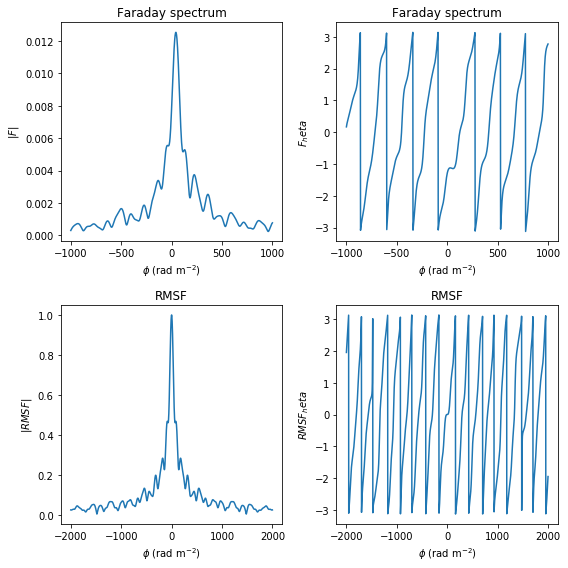

In [24]:
fig, ((a, b), (c, d)) = plt.subplots(2, 2, figsize=(8, 8))
a.plot(phi_arr, abs(fdf))
a.set_xlabel('$\\phi$ (rad m$^{-2}$)')
a.set_ylabel('$|F|$')
a.set_title('Faraday spectrum')
b.plot(phi_arr, numpy.angle(fdf))
b.set_xlabel('$\\phi$ (rad m$^{-2}$)')
b.set_ylabel('$F_\theta$')
b.set_title('Faraday spectrum')
c.plot(phi_samp, abs(rmsf_arr))
c.set_xlabel('$\\phi$ (rad m$^{-2}$)')
c.set_ylabel('$|RMSF|$')
c.set_title('RMSF')
d.plot(phi_samp, numpy.angle(rmsf_arr))
d.set_xlabel('$\\phi$ (rad m$^{-2}$)')
d.set_ylabel('$RMSF_\theta$')
d.set_title('RMSF')
plt.tight_layout()
plt.savefig('jack-example-faraday.pdf')

In [ ]:
rmclean = do_rmclean

In [135]:
phi_samp

array([-2001.001001, -1998.998999, -1996.996997, ...,  1996.996997,
        1998.998999,  2001.001001])

In [110]:
numpy.savetxt('rmsf.txt', numpy.stack([phi_samp, rmsf_arr]).T)

In [138]:
for i in range(100):
    test_path = sorted(jack_path.iterdir())[i]
    colnames = ['freq', 'I', 'Q', 'U', 'I_RMS', 'Q_RMS', 'U_RMS']
    data = pandas.read_table(test_path, sep=' ', names=colnames)
    data['lsq'] = (3e8 / data.freq) ** 2
    n_phi = 1000
    phi_arr = numpy.linspace(-1000, 1000, n_phi)
    rmsynth = do_rmsynth(
        data.Q.values, data.U.values, data.lsq.values, phi_arr)
    fdf, (phi_samp, rmsf_arr), lsq, fwhm = rmsynth
    numpy.save('fdf_{}.npy'.format(i), fdf)

  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value in natural case.
  [========================================] 100%
Err: failed to fit the RMSF.
Defaulting to analytical value i

IndexError: list index out of range